In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NG_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,NaN,2.0,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,NaN,10.0,3.0,2.0,NaN
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,6.0,8.0,NaN,1.0,3.0,4.0,3.0,NaN,1.0
4,4.0,1.0,1.0,3.0,NaN,1.0,3.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...
678,NaN,1.0,1.0,NaN,2.0,1.0,NaN,NaN,1.0
679,2.0,1.0,1.0,1.0,NaN,NaN,3.0,NaN,1.0
680,5.0,NaN,10.0,NaN,4.0,10.0,NaN,6.0,3.0
681,1.0,1.0,NaN,3.0,2.0,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	132
float64		column 2	66
float64		column 3	103
float64		column 4	132
float64		column 5	169
float64		column 6	169
float64		column 7	132
float64		column 8	202
float64		column 9	99


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,551.000000,617.000000,580.000000,551.000000,514.000000,514.000000,551.000000,481.000000,584.000000
mean,4.359347,3.074554,3.179310,2.700544,3.256809,3.303502,3.297641,2.752599,1.606164
std,2.641229,2.978432,2.910096,2.736152,2.182734,3.438304,2.254364,2.918176,1.773358
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,5.000000,4.000000,5.000000,3.000000,4.000000,5.000000,4.000000,3.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

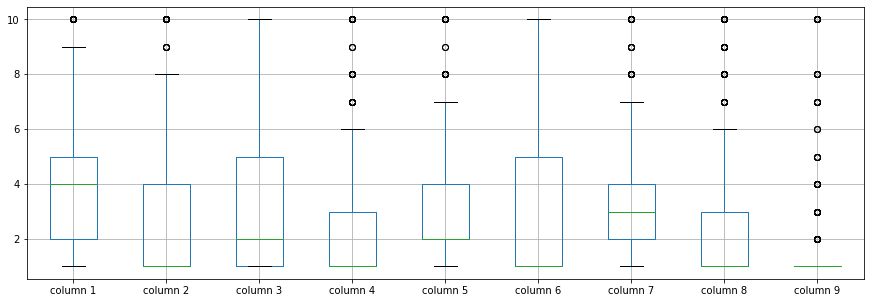

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.359347
column 2    3.074554
column 3    3.179310
column 4    2.700544
column 5    3.256809
column 6    3.303502
column 7    3.297641
column 8    2.752599
column 9    1.606164
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.592852,0.612165,0.448837,0.465634,0.479203,0.501024,0.525373,0.363182
column 2,0.592852,1.000000,0.887469,0.694347,0.719659,0.655166,0.747570,0.712655,0.445221
column 3,0.612165,0.887469,1.000000,0.663739,0.686766,0.709442,0.702849,0.744030,0.433636
column 4,0.448837,0.694347,0.663739,1.000000,0.559658,0.610949,0.620590,0.619847,0.487877
column 5,0.465634,0.719659,0.686766,0.559658,1.000000,0.587569,0.601104,0.619161,0.476425
column 6,0.479203,0.655166,0.709442,0.610949,0.587569,1.000000,0.615544,0.555718,0.337429
column 7,0.501024,0.747570,0.702849,0.620590,0.601104,0.615544,1.000000,0.642669,0.353980
column 8,0.525373,0.712655,0.744030,0.619847,0.619161,0.555718,0.642669,1.000000,0.404922
column 9,0.363182,0.445221,0.433636,0.487877,0.476425,0.337429,0.353980,0.404922,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [11]:
imputer = md.Midas(layer_structure = [9,9+34,9+34+34,9+34+34,9+34+34+34+34,9+34+34+34+34+34,9+34+34+34+34+34+34,9+34+34+34+34+34,9+34+34+34+34,9+34+34+34,9+34+34,9+34,9], vae_layer = False, seed = 340)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 28.316215288071405
Epoch: 1 , loss: 28.402545156933012
Epoch: 2 , loss: 28.23893065679641
Epoch: 3 , loss: 26.895503044128418
Epoch: 4 , loss: 25.3203250340053
Epoch: 5 , loss: 24.504619371323358
Epoch: 6 , loss: 24.288733346121653
Epoch: 7 , loss: 23.67886550085885
Epoch: 8 , loss: 23.58503530139015
Epoch: 9 , loss: 23.370613461449032
Epoch: 10 , loss: 22.853480702354794
Epoch: 11 , loss: 22.921450524103072
Epoch: 12 , loss: 22.58874550319853
Epoch: 13 , loss: 22.485121931348527
Epoch: 14 , loss: 22.76772844223749
Epoch: 15 , loss: 22.028146630241757
Epoch: 16 , loss: 22.2599451428368
Epoch: 17 , loss: 21.82285756156558
Epoch: 18 , loss: 21.769660450163343
Epoch: 19 , loss: 21.864924044836137
Epoch: 20 , loss: 22.00576355343773
Epoch: 21 , loss: 21.350643021719797
Epoch: 22 , loss: 21.131910732814244
Epoch: 23 , loss: 21.354178019932338
Epoch: 24 , loss: 21.33426284790039
Epoch: 25 , loss: 21.721716426

In [12]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [13]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.000000
column 2    1.000000
column 3    1.000000
column 4    1.000000
column 5    2.000000
column 6    1.000000
column 7    2.000000
column 8    1.000000
column 9    1.218597
Name: 21, dtype: float64

In [14]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [15]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.00000,0.000000,2.755411,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,-6.677458,0.000000,0.000000,0.000000,-0.724553
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.00000,-5.919162,0.000000,0.000000,0.000000,0.000000,-5.181552,0.000000
4,0.000000,0.00000,0.000000,0.000000,-0.150143,0.000000,0.000000,0.682538,0.000000
...,...,...,...,...,...,...,...,...,...
678,-2.030815,0.00000,0.000000,-0.327048,0.000000,0.000000,-1.164209,-0.326779,0.000000
679,0.000000,0.00000,0.000000,0.000000,-1.219260,-0.196371,0.000000,-0.311189,0.000000
680,0.000000,-8.01513,0.000000,-8.250870,0.000000,0.000000,-2.888105,0.000000,0.000000
681,0.000000,0.00000,0.556796,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [16]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [17]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [18]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(120.33732101989338, 335.3281974424459)

In [19]:
NRMS=numerator/denominator
NRMS


0.3588643064845374

In [20]:
new_df.iloc[66,:]

column 1    1.00000
column 2    3.00000
column 3    3.00000
column 4    2.00000
column 5    2.39694
column 6    1.00000
column 7    7.00000
column 8    2.00000
column 9    1.00000
Name: 66, dtype: float64

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.000000,1.00000,1.000000,3.755411,2.000000,1.000000,3.000000,1.000000,1.000000
1,5.000000,4.00000,4.000000,5.000000,0.322542,10.000000,3.000000,2.000000,0.275447
2,3.000000,1.00000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000
3,6.000000,8.00000,2.080838,1.000000,3.000000,4.000000,3.000000,1.818448,1.000000
4,4.000000,1.00000,1.000000,3.000000,1.849857,1.000000,3.000000,1.682538,1.000000
...,...,...,...,...,...,...,...,...,...
678,0.969185,1.00000,1.000000,0.672952,2.000000,1.000000,0.835791,0.673221,1.000000
679,2.000000,1.00000,1.000000,1.000000,0.780740,0.803629,3.000000,0.688811,1.000000
680,5.000000,1.98487,10.000000,1.749130,4.000000,10.000000,2.111895,6.000000,3.000000
681,1.000000,1.00000,1.556796,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
imputations[-1].to_excel("BCW_NG_20(imp).xlsx", index=False, header=False)